In [1]:
from UtaMethodsTest import *
import numpy as np
from matplotlib import pyplot as plt

<p>Για την εφαρογή των μεθόδων UTA και UTASTAR ο χρήστης χρειάζζεται να εισάγει τα εξής δεδομένα:</p>
<p>data: Η μεταβλητή αυτή αφορά τα δεδομένα του πολυκριτήριου πίνακα, τα οποία
εισάγονται είτε σε μορφή pandas data frame είτε σε numpy array. Στην περίπτωση
που εισαχθούν σε μορφή pandas data frame θα πρέπει να περιέχεται και μία στήλη
με ετικέτα “Ranking” ή “Rank” που θα περιγράφει τις κατατάξεις</p>
<p>alternatives: Δέχεται σε μορφή λίστας τα ονόματα των εναλλακτικών. Σε περίπτωση που δεν
εισαχθεί το σύστημα ονομάζει τις εναλλακτικές ως alternative1, alternative2,...</p>
<p>criteria: Δέχεται σε μορφή λίστας τα ονόματα των κριτηρίων. Σε περίπτωση που δεν
εισαχθεί το σύστημα ονομάζει τα κριτήρια criteria1, criteria2...</p>
<p>ranking: Δέχεται σε μορφή λίστας ή πίνακα numpy την κατάταξη των εναλλακτικών. Σε
περίπτωση pandas dataframe δεν χρειάζεται η εισαγωγή αυτής της μεταβλητής</p>
<p>monotonicity: Δέχεται σε μορφή λίστας ή πίνακα numpy την μονοτονία των εναλλακτικών τιμών
με αποδεκτές τιμές 1 για αύξουσα μονοτονία και 0 για φθίνουσα</p>
<p>bestvalues: Δέχεται σε μορφή λίστας ή πίνακα numpy τις καλύτερες τιμές που μπορεί να λάβει
κάθε κριτήριο. Σε περίπτωση που δεν συμπληρωθεί ο πίνακας η συνάρτηση λαμβάνει σαν την καλύτερη τιμή την τιμή του πολυκριτήριου πίνακα, έχοντας
υπόψιν την μονοτονία του κριτηρίου.</p>
<p>worstvalues: Δέχεται σε μορφή λίστας ή πίνακα numpy τις χειρότερες τιμές που μπορεί να λάβει
κάθε κριτήριο. Σε περίπτωση που δεν συμπληρωθεί ο πίνακας η συνάρτηση
λαμβάνει σαν την χειρότερη τιμή την τιμή του πολυκριτήριου πίνακα, έχοντας
υπόψιν την μονοτονία του κριτηρίου.</p>
<p>intervals: Δέχεται σε μορφή λίστας ή πίνακα numpy τα διαστήματα στα οποία θα χωριστεί το
κάθε κριτήριο. Αν δεν δοθεί τιμή χωρίζει όλα τα κριτήρια σε 3 διαστήματα</p>
<p>method: Δέχεται σαν είσοδο την μέθοδο με την οποία θα επιλυθεί το γραμμικό πρόβλημα.
Οι αποδεκτές τιμές είναι αυτές που δέχεται η linprog της scipy, δηλαδή οι τιμές
“simplex” και “interior-point”.</p>
<p>epsilon: Η μεταβλητή epsilon καθορίζει το αποδεκτό σφάλμα που ο χρήστης είναι
διατεθειμένος να αποδεχτεί κατά την διάρκεια της μετά-βελτιστοποίησης .
Προκαθορισμένη τιμή είναι 0,005.</p>
<p>delta: Η μεταβλητή delta ορίζει την ελάχιστη απόσταση μεταξύ της κατάταξης μίας
εναλλακτικής με την αμέσως χειρότερη της κατά την δόμηση του γραμμικού
προβλήματος. Προκαθορισμένη τιμή είναι 0,05.</p>
<p>sigma(μονο για την UTA): Η μεταβλητή sigma καθορίζει την ελάχιστη διαφορά που πρέπει να έχουν οι
χρησιμότητες ενός κριτηρίου όσο αυξάνεται η τιμή σου στο διακριτό διάστημα.
Προκαθορισμένη τιμή είναι 0.</p>

In [2]:
df = np.array([[173, 11.4, 10.01, 10, 7.88, 49500],
               [176, 12.3, 10.48, 11, 7.96, 46700],
               [142, 8.2,  7.3,    5, 5.65, 32100],
               [148, 10.5, 9.61,   7, 6.15, 39150],
               [178, 14.5, 11.05, 13, 8.06, 64700],
               [180, 13.6, 10.4,  13, 8.47, 75700],
               [182, 12.7, 12.26, 11, 7.81, 68593],
               [145, 14.3, 12.95, 11, 8.38, 55000],
               [161, 8.6,  8.42,  7,  5.11, 35200],
               [117, 7.2,  6.75,  3,  5.81, 24800]])
alternatives = ["Pegaut 505GR", "Opel Record", "Citroen Visa", "VW Golf","Citroen CX", "Mercedes 230", "BMW 520", "Volvo 244","Pegaut 104", "Citroen dyane"]
ranking = [1, 2, 3,  4, 5, 6, 7, 8, 9, 10]
bestvalues = [190, 7, 6, 13, 9, 20000]
worstvalues = [110, 15, 13, 3, 5, 80000]
monotonicity = [1, 0, 0, 1, 1, 0]
intervals = [4, 3, 3, 4, 3, 4]

<p>Παραπάνω παρουσιάζεται το παράδειγμα της βιβλιογραφίας για την επιλογή αυτοκινήτου</p>

In [3]:
res1 = UTA(data=df, ranking=ranking,alternatives=alternatives, bestvalues=bestvalues,worstvalues=worstvalues, 
          monotonicity=monotonicity, intervals=intervals, epsilon=0.0009, delta=0.01, method='simplex')

In [4]:
print(res1)

              g: [[110.0, 130.0, 150.0, 170.0, 190.0], [15.0, 12.333333333333334, 9.666666666666668, 7.0], [13.0, 10.666666666666666, 8.333333333333332, 6.0], [3.0, 5.5, 8.0, 10.5, 13.0], [5.0, 6.333333333333333, 7.666666666666666, 9.0], [80000.0, 65000.0, 50000.0, 35000.0, 20000.0]]
     crit_names: ['u1.1', 'u1.2', 'u1.3', 'u1.4', 'u1.5', 'u2.1', 'u2.2', 'u2.3', 'u2.4', 'u3.1', 'u3.2', 'u3.3', 'u3.4', 'u4.1', 'u4.2', 'u4.3', 'u4.4', 'u4.5', 'u5.1', 'u5.2', 'u5.3', 'u5.4', 'u6.1', 'u6.2', 'u6.3', 'u6.4', 'u6.5']
 crit_utilities: array([0.        , 0.08806862, 0.14076235, 0.14749506, 0.14749506,
       0.        , 0.01271459, 0.13286187, 0.13858418, 0.        ,
       0.03465301, 0.04392094, 0.21463288, 0.        , 0.13902234,
       0.17518794, 0.17886306, 0.18732821, 0.        , 0.14124451,
       0.21152058, 0.21152058, 0.        , 0.02833728, 0.05855904,
       0.06677316, 0.1004391 ])
   alternatives: ['Pegaut 505GR', 'Opel Record', 'Citroen Visa', 'VW Golf', 'Citroen CX', 'Merced

<p>Επιλύωντας την μέθοδο UTA μπορούμε να δούμε τα διάφορα γνωρίσματα του αποτελέσματος.Το αποτέλεσμα είναι σε μορφή αντικειμένου. Προκειμένου να έχουμε πρόσβαση σε ένα γνώρισμα όπως οι χρησιμότητες κριτηρίων απλά χρειάζεται να το καλέσουμε. </p>


In [5]:
for i in range(len(res1.crit_names)):
    print(res1.crit_names[i]+' = '+str(res1.crit_utilities[i]))


u1.1 = 0.0
u1.2 = 0.08806861504281327
u1.3 = 0.14076235218651606
u1.4 = 0.14749506202185853
u1.5 = 0.14749506202185858
u2.1 = 0.0
u2.2 = 0.012714586658919913
u2.3 = 0.13286187238961686
u2.4 = 0.13858417637289072
u3.1 = 0.0
u3.2 = 0.03465300511068988
u3.3 = 0.04392093593734229
u3.4 = 0.21463288258257202
u4.1 = 0.0
u4.2 = 0.13902234486997275
u4.3 = 0.17518794064361504
u4.4 = 0.17886306198310292
u4.5 = 0.18732820618178025
u5.1 = 0.0
u5.2 = 0.14124450652651568
u5.3 = 0.2115205775567871
u5.4 = 0.2115205775567871
u6.1 = 0.0
u6.2 = 0.028337275982978253
u6.3 = 0.05855903868756646
u6.4 = 0.06677315986706041
u6.5 = 0.10043909528411166


<p>Όσο αφορά τα αποτελέσματα υπάρχει μία απόκλιση στις τιμές των χρησιμοτήτων καθώς η UTA έχει προγραμματιστεί να δέχεται την τιμή epsilon σαν μία προστιθέμενη τιμή όπως στην UTASTAR και όχι σαν πολλαπλάσιο του σφάλματος όπως στην βιβλιογραφία.</p>

<p>Παρακάτω παρουσιάζεται το παράδειγμα των μεταφορικών μέσων από την βιβλιογραφία, πάνω στο οποίο εφαρρμόζεται η UTASTAR. </p>

In [6]:
df = np.array([[3, 10, 1],
               [4, 20, 2],
               [2, 20, 0],
               [6, 40, 0],
               [30, 30, 3]])
ranking = [1, 2, 2, 3,  4]
alternatives = ['a', "b", "c", 'd', 'f']
criteria = ['Price','Time','Comfort']
bestvalues = [2, 10, 3]
worstvalues = [30, 40, 0]
monotonicity = [0, 0, 1]
intervals = [2, 3, 3]

In [7]:
res2 = UTASTAR(df, ranking=ranking, criteria=criteria,alternatives=alternatives, bestvalues=bestvalues,
              worstvalues=worstvalues, monotonicity=monotonicity, intervals=intervals)


In [8]:
print(res2)

              g: [[30.0, 16.0, 2.0], [40.0, 30.0, 20.0, 10.0], [0.0, 1.0, 2.0, 3.0]]
     crit_names: ['u1.1', 'u1.2', 'u1.3', 'u2.1', 'u2.2', 'u2.3', 'u2.4', 'u3.1', 'u3.2', 'u3.3', 'u3.4']
 crit_utilities: array([0.00000000e+00, 3.89866222e-01, 5.06532889e-01, 0.00000000e+00,
       3.79202718e-11, 1.58029077e-01, 3.40550445e-01, 0.00000000e+00,
       1.73707610e-02, 1.73707611e-02, 1.52916667e-01])
        w_names: ['w1.1', 'w1.2', 'w2.1', 'w2.2', 'w2.3', 'w3.1', 'w3.2', 'w3.3']
              w: array([[3.89866222e-01, 1.16666667e-01, 3.79202718e-11, 1.58029077e-01,
        1.82521368e-01, 1.73707610e-02, 2.14793444e-11, 1.35545906e-01]])
   alternatives: ['a', 'b', 'c', 'd', 'f']
 alts_utilities: array([0.85612076, 0.66526606, 0.66456197, 0.47319956, 0.15291667])
         errors: array([2.07879524e-03, 1.62765289e-10, 2.39634478e-10, 7.04094408e-04,
       2.75134561e-10, 2.87414816e-10, 9.13746074e-04, 5.79570893e-11,
       3.02487570e-11, 1.30336426e-03])
       criteria: ['Pri

<P>Αντίστοιχα με την UTA μπορούμε να δούμε τα γνωρίσματα με την εντολή print, μέσα στα οποία βρίσκονται οι χρησιμότητες των κριτηρίων και των εναλλακτικών. Σε αυτό το παράδειγμα θα οτικοποιήθούν οι χρησιμότητες των εναλλακτικών και τα σφάλματα.</P>

In [9]:
for countAlts in range(len(res2.alternatives)):
    print(res2.alternatives[countAlts]+" = "+str(res2.alts_utilities[countAlts]))

print("\n")
countError = 0
for countAlts in range(len(res2.alternatives)):
    errorplus = 's'+res2.alternatives[countAlts]+"+"+" = "+str(res2.errors[countError])
    errorminus = 's'+res2.alternatives[countAlts]+"-"+" = "+str(res2.errors[countError+1])
    print(errorplus)
    print(errorminus)
    countError +=2


a = 0.856120761696716
b = 0.6652660605148237
c = 0.6645619661673907
d = 0.4731995560201383
f = 0.15291666674258703


sa+ = 0.00207879524156707
sa- = 1.627652885105561e-10
sb+ = 2.396344778740892e-10
sb- = 0.0007040944078177169
sc+ = 2.7513456110493406e-10
sc- = 2.8741481641866757e-10
sd+ = 0.0009137460743324395
sd- = 5.7957089264851515e-11
sf+ = 3.024875699872801e-11
sf- = 0.0013033642603207877


<p>Καθώς η UTADIS αποτελεί μέθοδο ταξινόμησης χρησιμοποιεί διαφορετικά δεδομένα εισόδου. Επιπλέον σε αντίθεση με την UTA και την UTASTAR δεν καλείται σαν συνάρτηση αλλά σαν κλάση και η επιλυσή του προβλήματος γίνεται μέσω των μεθόδων της κλάσης  </p>
<p>Τα δεδομένα που χρειάζονται για την εφαρμογή της μεθόδου είναι:</p>
<p>groups: Δέχεται σε μορφή λίστας τις ομάδες για κάθε εναλλακτική. Η εισαγωγή της
μεταβλητής είναι υποχρεωτική.</p>
<p>pref_order: Δέχεται σε μορφή λίστας τις προκαθορισμένες ομάδες με αύξουσα σειρά
ξεκινώντας από την θέση 0 της λίστας, μέχρι την τελευταία. Η εισαγωγή της
μεταβλητής είναι υποχρεωτική.</p>

<p>Μέσω του παραδείγματος από το άρθρο του Ζυγομήτρου γίνετται βηματική επίληση της μεθόδου.</p>

In [10]:
df = np.array([[180, 2, 3], 
               [200, 2, 2], 
               [40, 3, 3], 
               [80, 3, 3], 
               [100, 2, 1], 
               [70, 1, 2],
               [120, 1, 1]])
pref_order = ['NO', '?', 'YES']
groups = ['YES','YES','?','YES','?','NO','NO']
bestvalues = [200, 3, 3]
worstvalues = [0, 1, 1]
intervals = [4, 2, 2]

In [11]:
res = UTADIS()
x = res.fit(data=df, groups=groups, pref_order=pref_order, 
        bestvalues=bestvalues, worstvalues=worstvalues, 
        intervals=intervals, epsilon=0.005, delta=0.05,
        sigma=0.1, method='interior-point')

<p>Αρχικά ορίζεται η μεταβλητή res ως κλάση UTADIS και στην συνέχεια εκτελείται η μέθοδος fit που δημιουργεί το μοντέλο με το οποίο θα γίνουν οι προβλέψεις. Το μεντέλο εκχωρείται στην μεταβλητή x ωστε να μπορεί να γίνει οπτική απεικόνιση των χρησιμοτήτων.</p>


In [12]:
print(x)

                g: [[0, 50.0, 100.0, 150.0, 200.0], [1, 2.0, 3.0], [1, 2.0, 3.0]]
         w_values: array([0.10383649, 0.13492199, 0.01998302, 0.16337071, 0.35308215,
       0.04836974, 0.06362815, 0.11280775])
 transitionpoints: array([0.59251383, 0.69263148])
           errors: array([0.00033183, 0.00033584, 0.11856101, 0.03239416, 0.00105177,
       0.0502234 , 0.10097449, 0.00026271, 0.00042534])


<p>Στην συνέχεια για ένα σετ δεδομένων με άγνωστες ομάδες γίνεται εφαρμογή του μοντέλου για πρόβλεψη των ομάδων. Η πρόβλεψη γίνεται με την χρήση της εντολής predict ενώ αν θέλουμε να δούμε την συνολική χρησιμότητα καλούμε την εντολή altsestimation αμέσως μετά το predict.</p>

In [13]:
data = np.array([[40, 3, 2],
                 [130, 1, 3],
                 [80, 2, 3],
                 [30, 3, 3],
                 [70, 2, 1],
                 [150, 1, 1],
                 [60, 2, 2],
                 [180, 1, 2]])

y = res.predict(data)
d = res.altsestimation()

print(y)
print(d)
print(x.transitionpoints)

['NO' 'NO' 'YES' '?' 'NO' 'NO' 'NO' 'NO']
[0.54814923 0.42718419 0.71430773 0.64018968 0.51088744 0.2587415
 0.54753119 0.42039208]
[0.59251383 0.69263148]


<p>Η εργαλειοθήκη δίνει την δυνατότητα να οπτικοποιήσει τα αποτελέσματα των μεθόδων δημιουργώντας γρφήματα. Για τη δημιουργία γραφημάτων καλούμε είτε την εντολή criteriaPlot() είτε την alternativesPlot() και εισάγουμε σαν μέσα στις εντολές το αντικείμενο για το οποίο θέλουμε να γίνει η οπτικοποίηση. Από κάτω φαίνετι ένα παράδειγμα χρήσης της criteriaPlot πάνω στα δεδομένα της UTASTAR και ένα παράδειγμα της alternativesPlot πάνω στα δεδομένα της UTA.</p>

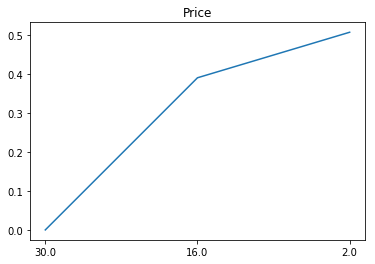

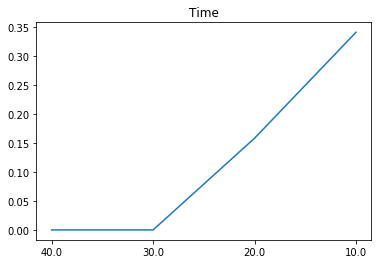

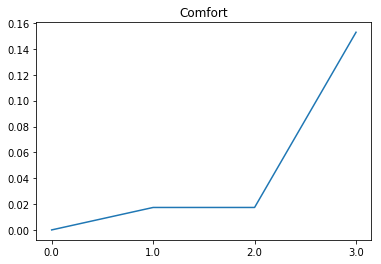

0

In [14]:
criteriaPlot(res2)

0

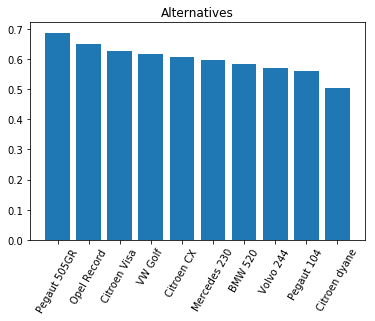

In [15]:
alternativesPlot(res1)